In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
data = pd.read_csv('D:\\Data-science\\wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### distribution of features using histograms, pair plots, or density plots.

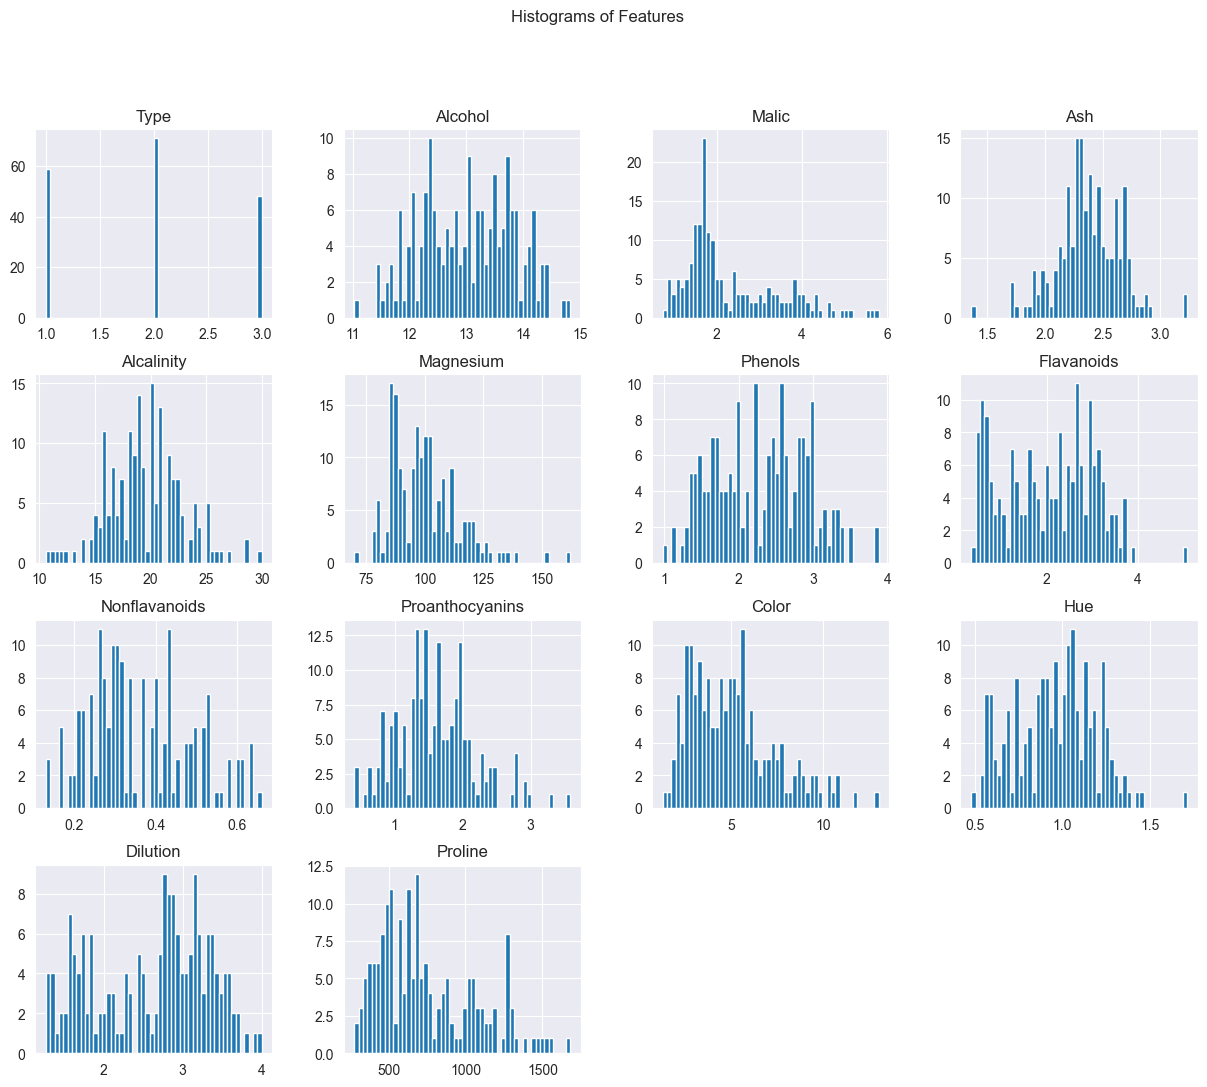

In [6]:
data.hist(bins=50, figsize=(15, 12))
plt.suptitle("Histograms of Features", fontsize=12)
plt.show()

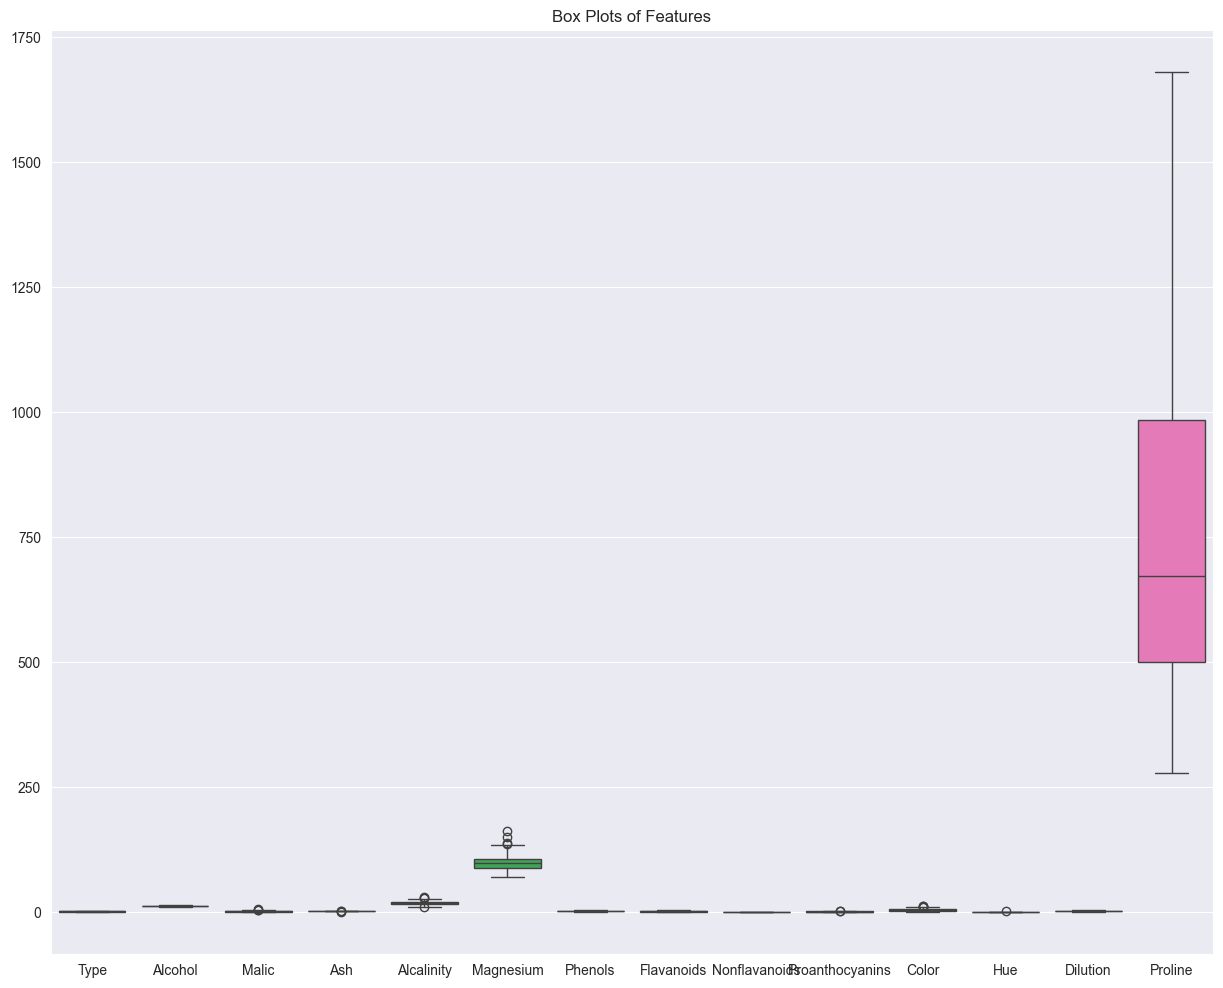

In [7]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=data)
plt.title("Box Plots of Features", fontsize=12)
plt.show()

C:\Users\naveen.julla\AppData\Local\Temp\ipykernel_7844\4016086872.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Alcohol"], shade=True, label="Alcohol", color="blue")
C:\Users\naveen.julla\AppData\Local\Temp\ipykernel_7844\4016086872.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Malic"], shade=True, label="Malic", color=custom_palette[1])


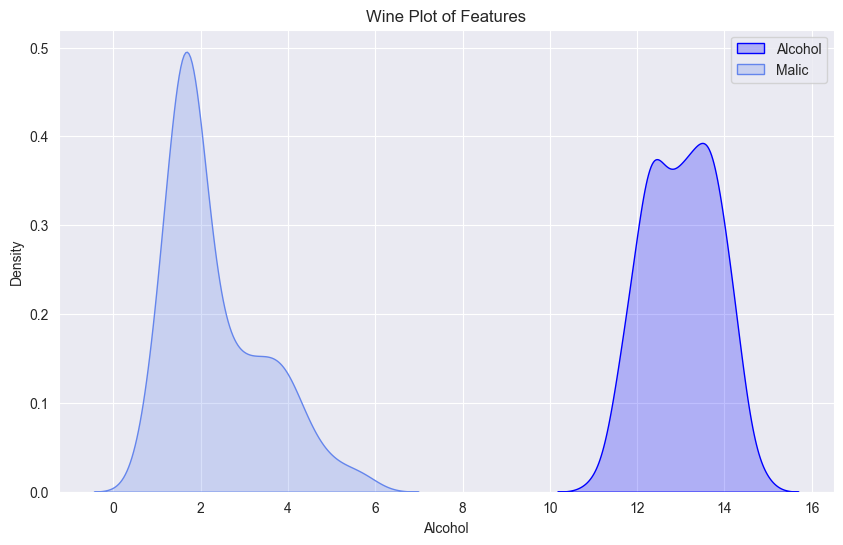

In [8]:
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("coolwarm", 14)  # Generates 10 colors
sns.kdeplot(data["Alcohol"], shade=True, label="Alcohol", color="blue")
sns.kdeplot(data["Malic"], shade=True, label="Malic", color=custom_palette[1])
# sns.kdeplot(data["Ash"], shade=True, label="Ash", color=custom_palette[2])
# sns.kdeplot(data["Alcalinity"], shade=True, label="Alcalinity", color=custom_palette[3])
# sns.kdeplot(data["Magnesium"], shade=True, label="Magnesium", color=custom_palette[4])
# sns.kdeplot(data["Phenols"], shade=True, label="Phenols", color=custom_palette[5])
# sns.kdeplot(data["Flavanoids"], shade=True, label="Flavanoids", color=custom_palette[6])
# sns.kdeplot(data["Nonflavanoids"], shade=True, label="Nonflavanoids", color=custom_palette[7])
# sns.kdeplot(data["Proanthocyanins"], shade=True, label="Proanthocyanins", color=custom_palette[8])
# sns.kdeplot(data["Color"], shade=True, label="Color", color=custom_palette[9])
# sns.kdeplot(data["Hue"], shade=True, label="Hue", color=custom_palette[10])
# sns.kdeplot(data["Dilution"], shade=True, label="Dilution", color=custom_palette[11])
# sns.kdeplot(data["Proline"], shade=True, label="Proline", color=custom_palette[12])
plt.title("Wine Plot of Features", fontsize=12)
plt.legend()
plt.show()

#### Steps to Investigate Correlations Between Features


In [9]:
corr_matrix = data.corr()
corr_matrix

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


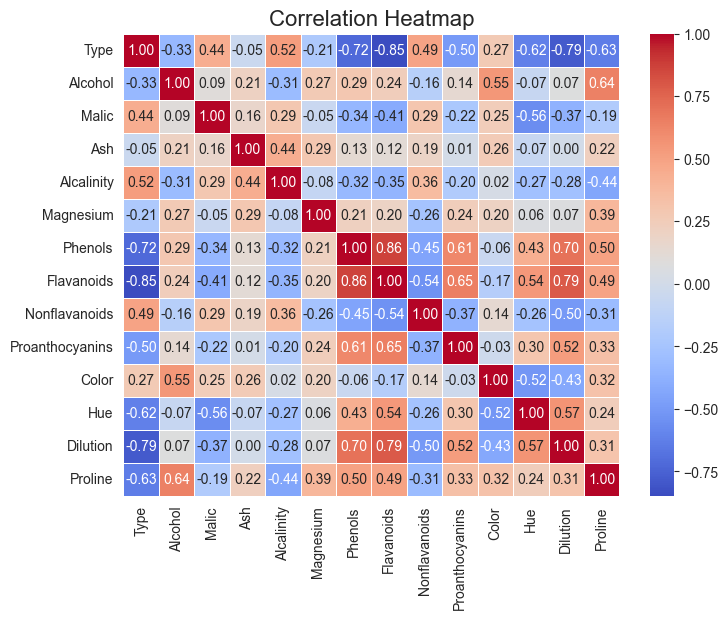

In [10]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

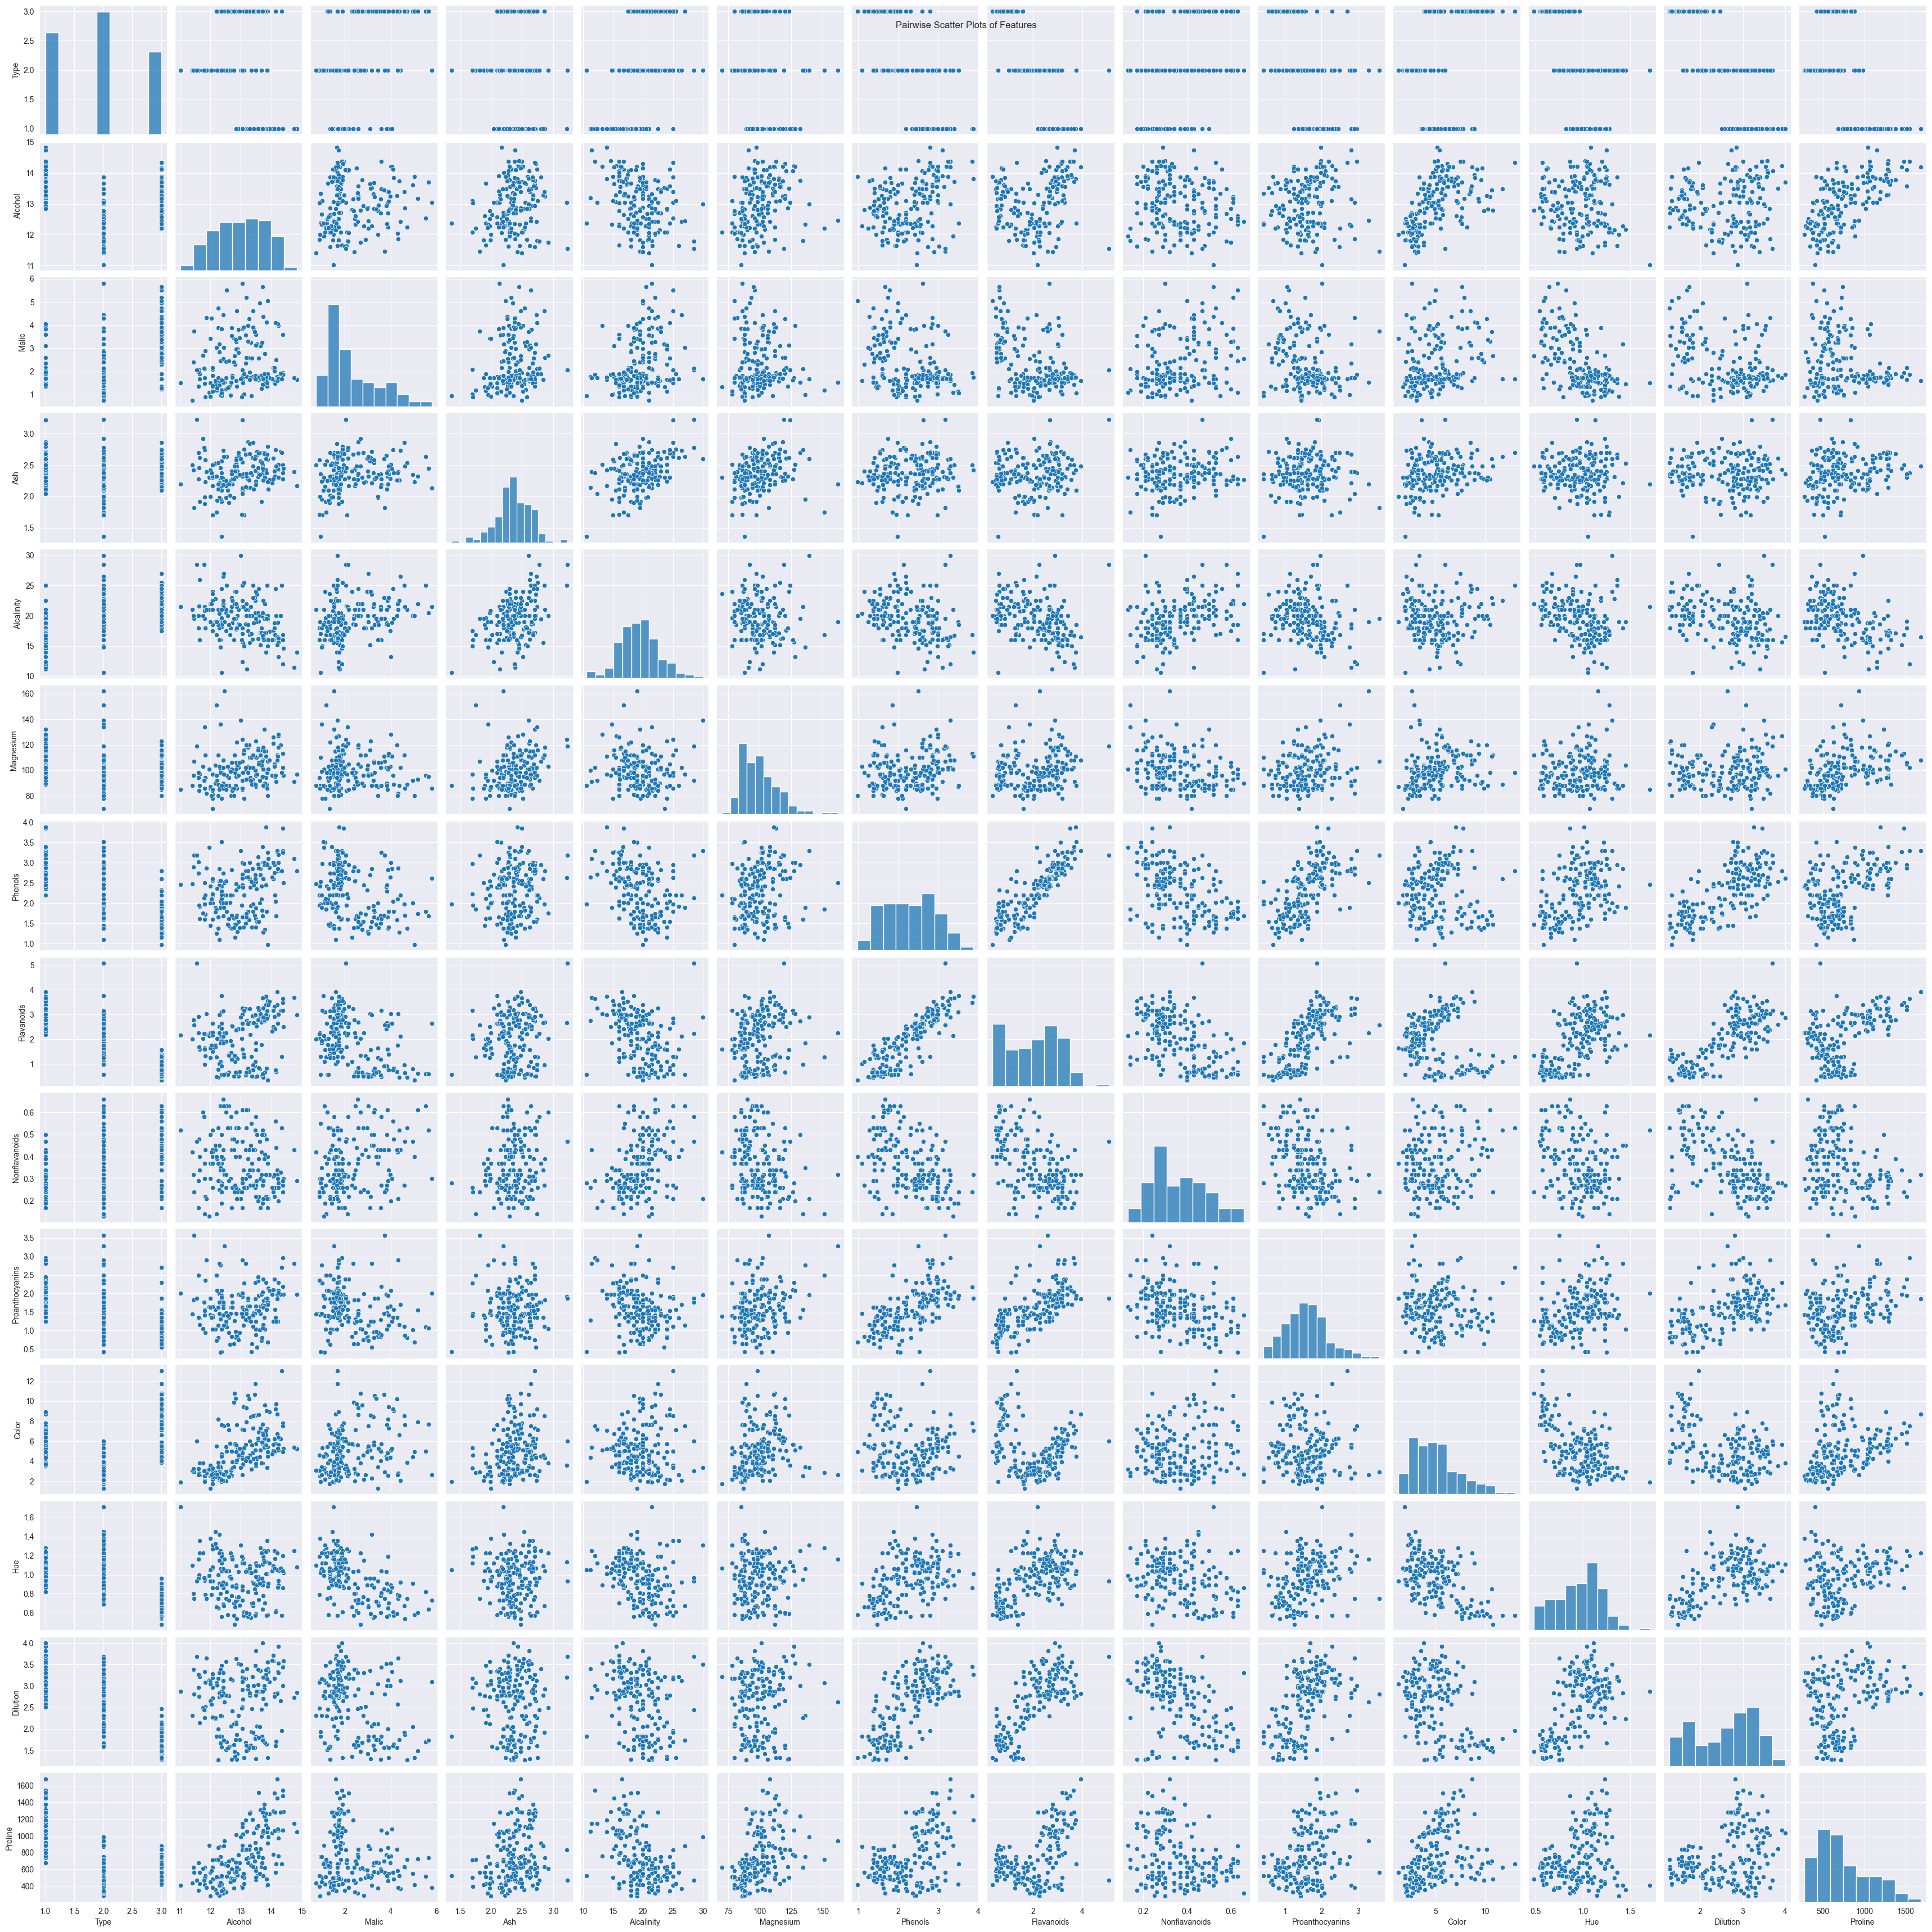

In [11]:
sns.pairplot(data)
plt.suptitle("Pairwise Scatter Plots of Features", fontsize=12)
plt.show()

In [12]:
threshold = 0.8
high_corr = corr_matrix[abs(corr_matrix) > threshold]
high_corr

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.847498,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Malic,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcalinity,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magnesium,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phenols,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.864564,NaN,NaN,NaN,NaN,NaN,NaN
Flavanoids,-0.847498,NaN,NaN,NaN,NaN,NaN,0.864564,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Nonflavanoids,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Proanthocyanins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [13]:
print(high_corr.shape)

(14, 14)


In [14]:
print("Highly correlated features Phenols,flavanoids")
print("inversely correlated features type,flavanoids")

Highly correlated features Phenols,flavanoids
inversely correlated features type,flavanoids


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [16]:
# Display the mean and standard deviation after scaling
print("Mean of standardized features:\n", np.mean(X_scaled, axis=0))
print("Standard deviation of standardized features:\n", np.std(X_scaled, axis=0))

Mean of standardized features:
 [ 1.59672525e-16 -8.38280756e-16 -1.19754394e-16 -8.37033314e-16
 -3.99181312e-17 -3.99181312e-17  0.00000000e+00 -3.99181312e-16
  3.59263181e-16 -1.19754394e-16  2.49488320e-17  1.99590656e-16
  3.19345050e-16 -1.59672525e-16]
Standard deviation of standardized features:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
pca = PCA(n_components=14)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [18]:
# Print the explained variance ratio
print(f"Explained variance ratio for each principal component: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")

Explained variance ratio for each principal component: [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]
Cumulative explained variance: [0.39542486 0.57378745 0.67707846 0.74335831 0.80603706 0.85409266
 0.89364973 0.91865217 0.93969088 0.95842703 0.97455906 0.98661596
 0.99587055 1.        ]


In [19]:

X_pca[:, 1]

array([ 1.45309844, -0.33001925,  1.03693595,  2.76821026,  0.86777309,
        2.13017513,  1.17916999,  1.61128232,  0.92317952,  0.79628417,
        1.31252342,  0.61298199,  0.67852331,  1.14012136,  2.11031917,
        1.66641801,  2.33089672,  1.63359016,  2.52840527,  1.06452946,
        0.79601279,  0.24008547, -0.08685755, -0.51561649, -0.31592057,
        0.93821529,  0.68710205, -0.09118403,  0.69274983,  0.1954729 ,
        1.24635279,  1.47827883,  0.05325201,  1.6346691 ,  0.69748039,
        0.17928892,  0.65787231,  0.11222505, -0.76930576,  1.80880887,
        0.78616157,  0.16588492,  1.16395547,  0.32607243, -0.06690594,
        1.77507765,  1.19762255,  0.65382196,  1.25023668,  1.75860365,
        0.17691581,  0.75210873,  1.62309187,  1.87852793,  1.02071516,
        1.33524369,  1.44363759,  1.2154925 ,  1.74060283, -3.07772383,
       -1.3899542 , -0.83885608, -1.26269589, -1.91338608, -1.91115097,
       -0.75872552, -1.87213142, -2.42575691, -0.22520902, -1.39

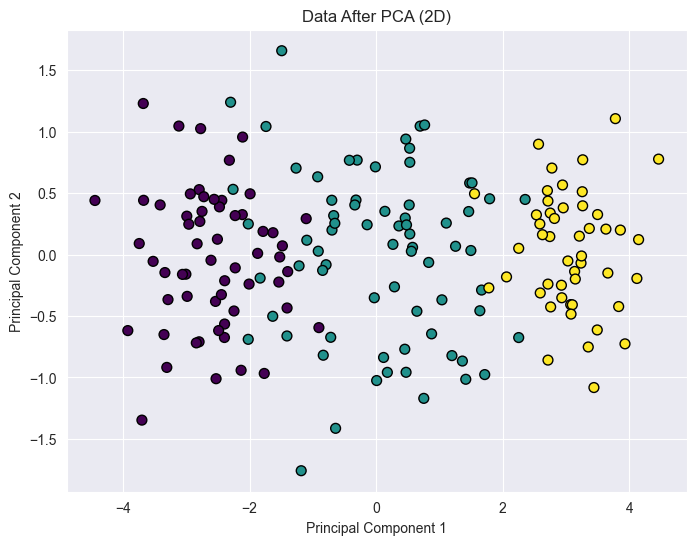

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 7], c=data['Type'], cmap='viridis', edgecolor='k', s=50)
plt.title("Data After PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

##### Clustering with Original Data:

In [45]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)
original = kmeans.transform(data)

In [24]:
labels = kmeans.labels_
labels

array([1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3,
       1, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0], dtype=int32)

In [26]:
centroids = kmeans.cluster_centers_
centroids

array([[2.26470588e+00, 1.25119118e+01, 2.48735294e+00, 2.28382353e+00,
        2.07764706e+01, 9.22205882e+01, 2.06705882e+00, 1.77544118e+00,
        3.88088235e-01, 1.46132353e+00, 4.07470587e+00, 9.41911765e-01,
        2.49573529e+00, 4.56294118e+02],
       [1.06666667e+00, 1.36740000e+01, 1.94566667e+00, 2.38300000e+00,
        1.71666667e+01, 1.06500000e+02, 2.82500000e+00, 2.94200000e+00,
        2.81666667e-01, 1.95066667e+00, 5.12566667e+00, 1.05966667e+00,
        3.18966667e+00, 1.05756667e+03],
       [1.00000000e+00, 1.39205000e+01, 1.76900000e+00, 2.49750000e+00,
        1.72000000e+01, 1.06650000e+02, 2.90800000e+00, 3.08150000e+00,
        2.95500000e-01, 1.90850000e+00, 6.32250000e+00, 1.11700000e+00,
        3.00850000e+00, 1.36085000e+03],
       [2.31666667e+00, 1.29111667e+01, 2.54966667e+00, 2.40833333e+00,
        1.99716667e+01, 1.02583333e+02, 2.08433333e+00, 1.50983333e+00,
        3.94333333e-01, 1.45200000e+00, 5.71733333e+00, 8.70766667e-01,
        2.321

In [35]:
sil_score = silhouette_score(data, labels)
db_index = davies_bouldin_score(data, labels)
print(f"k mean pca sil score {sil_score}")
print(f"k mean pca db index {db_index}")

k mean pca sil score 0.14051062996975208
k mean pca db index 3.1333128508658667


#### Clustering with PCA Data:

In [46]:

k_means_pca = KMeans(n_clusters=4, random_state=42)
k_means_pca.fit(X_pca)
original_pca = kmeans.transform(X_pca)

pca_labels = k_means_pca.labels_
pca_centroids = k_means_pca.cluster_centers_
print(f"k mean pca labels {pca_labels}")
print(f"k mean pca centroids {pca_centroids}")


k mean pca labels [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 0 3 0 0 3 3 0 3 0 3 0
 0 3 3 3 0 0 3 0 3 1 0 3 3 3 3 3 3 3 3 0 0 0 0 3 0 0 3 3 0 3 3 3 3 3 3 0 0
 3 3 3 3 3 3 3 3 3 0 0 0 0 0 3 0 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
k mean pca centroids [[-9.57679516e-01 -1.15541478e+00  8.42380488e-01  9.39000761e-01
   6.65117294e-01 -2.07916813e-01  1.18911121e-01 -5.98953480e-02
  -9.84367847e-02  2.07559987e-01 -5.18016921e-02 -8.05601982e-02
  -1.62317598e-01  1.15466552e-01]
 [ 3.05866503e+00  1.20826261e+00 -1.77541159e-01  9.57310533e-02
   7.16408426e-02 -9.49678146e-02 -6.26481511e-02  4.41488629e-02
  -1.72070147e-02  6.49625037e-02 -5.30750057e-03  5.84625962e-03
  -9.25579729e-02  3.95630885e-02]
 [-2.58109865e+00  9.72038097e-01 -1.59560392e-01 -1.90575163e-01
  -2.38106868e-01  2.35266577e-01  4.18333701e-03 -2.95233971e-02
 

C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [38]:
pca_sil_score = silhouette_score(X_pca, pca_labels)
pca_db_index = davies_bouldin_score(X_pca, pca_labels)
print(f"k mean pca sil score {pca_sil_score}")
print(f"k mean pca db index {pca_db_index}")

k mean pca sil score 0.2783424900578527
k mean pca db index 1.7975284900311959


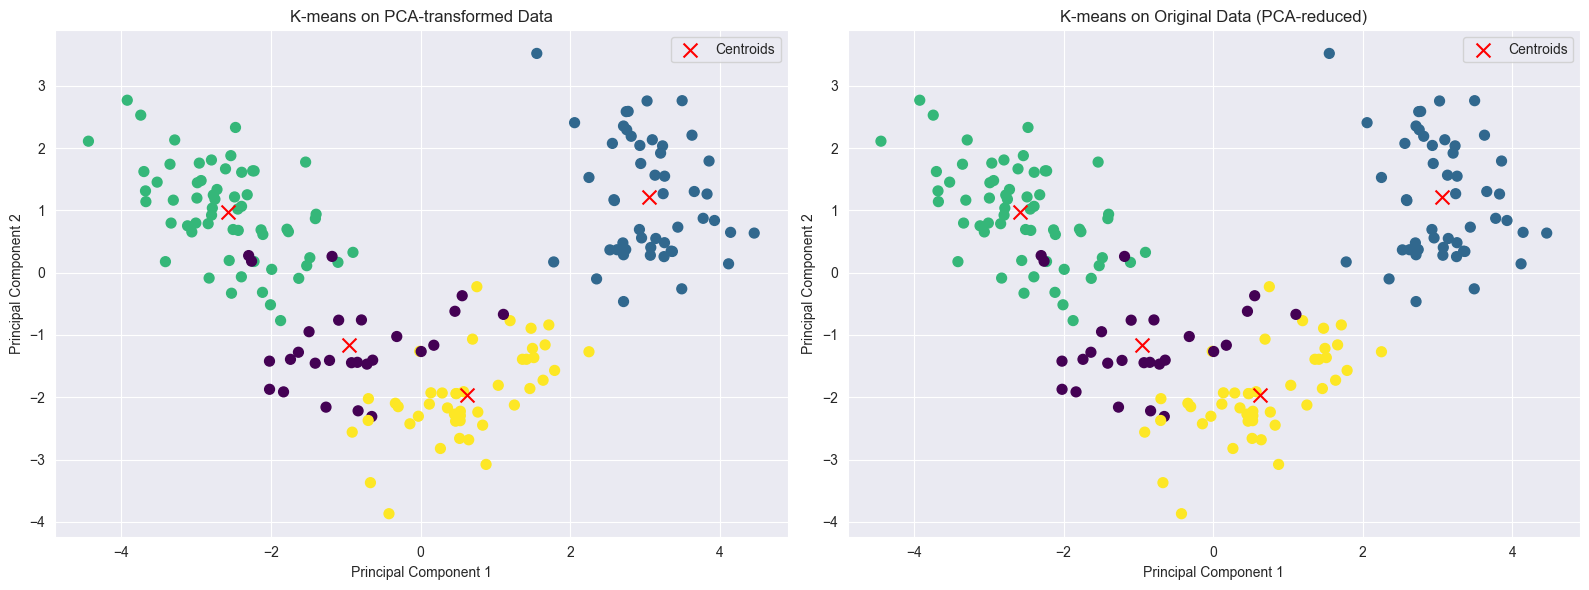

In [48]:
# Create side-by-side subplots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data clustering
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=pca_labels, cmap='viridis', marker='o', s=50)
ax1.scatter(pca_centroids[:, 0], pca_centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
ax1.set_title('K-means on PCA-transformed Data')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.legend()

# Plot PCA-transformed data clustering
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=50)
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
ax2.set_title('K-means on Original Data (PCA-reduced)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend()

plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(labels, pca_labels)
ari_score

1.0

In [51]:
print(f"ARI score: {ari_score}")
print(f"Kmeans sil_score: {sil_score}, After PCA sil_score {pca_sil_score}")
print(f"Kmeans db_index: {db_index}, After PCA db_index {pca_db_index}")

ARI score: 1.0
Kmeans sil_score: 0.14051062996975208, After PCA sil_score 0.2783424900578527
Kmeans db_index: 3.1333128508658667, After PCA db_index 1.7975284900311959
